In [19]:
import numpy as np
import pandas as pd

In [20]:
df = pd.read_csv('pca_data.txt', delimiter=' ', header=None)
df.shape

(1000, 500)

In [21]:
df.isnull().values.any()

False

In [22]:
mean = df.mean(axis=0)
std = df.std(axis=0)

df_normalization = (df - mean) / std

cov_matrix = df.cov()

In [23]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [24]:
k = 2
sorted_indices = np.argsort(eigenvalues)[::-1]

top_indices = sorted_indices[:k]

top_eigenvectors = eigenvectors[:, top_indices]
changed_data = np.dot(df_normalization, top_eigenvectors)

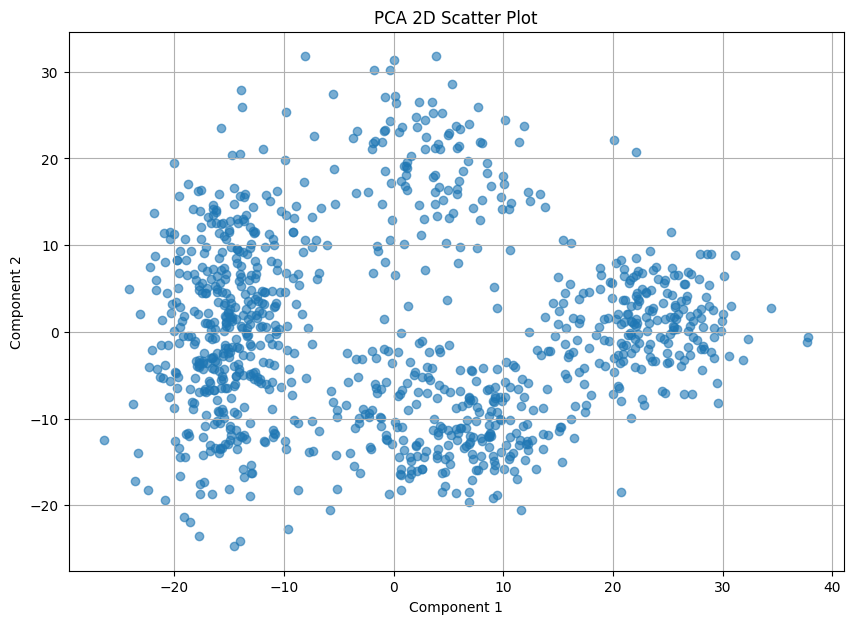

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(changed_data[:, 0], changed_data[:, 1], alpha=0.6)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA 2D Scatter Plot')
plt.grid(True)
plt.show()

x:\Anaconda\envs\pytorch_env\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


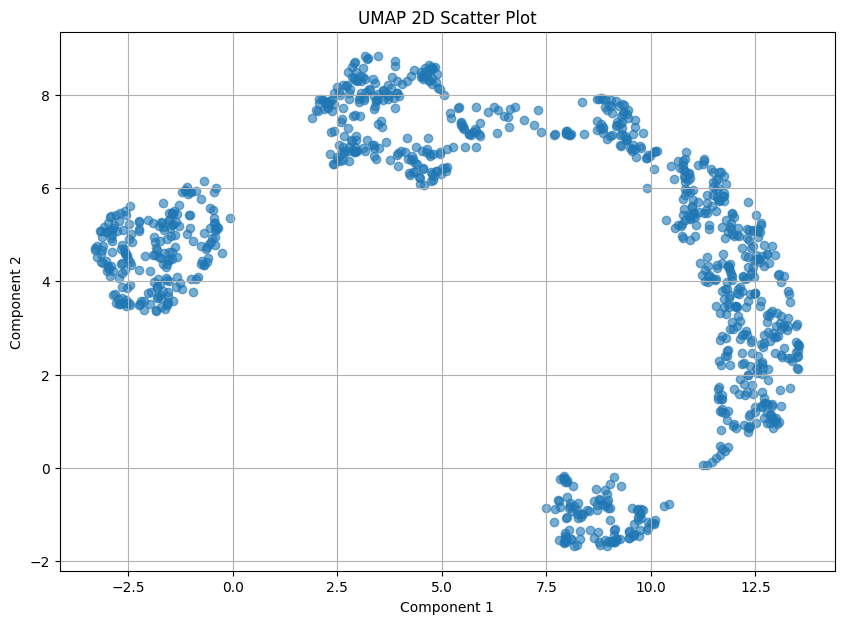

In [26]:
import umap

umap_model = umap.UMAP(n_components=2, random_state=42)
umap_transformed = umap_model.fit_transform(df_normalization)

plt.figure(figsize=(10, 7))
plt.scatter(umap_transformed[:, 0], umap_transformed[:, 1], alpha=0.6)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('UMAP 2D Scatter Plot')
plt.grid(True)
plt.show()

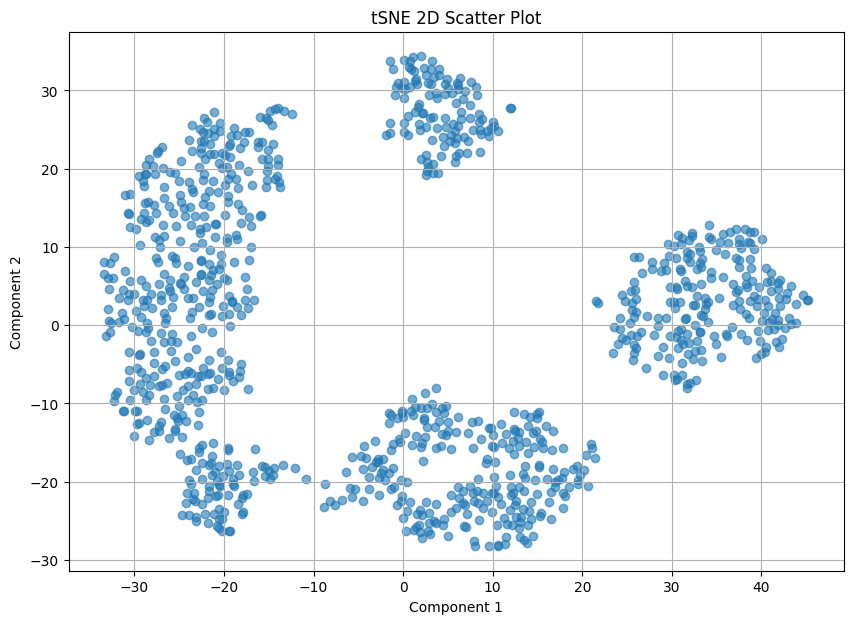

In [27]:
from sklearn.manifold import TSNE

df_normalization_array = df_normalization.values

tsne_model = TSNE(n_components=2, random_state=42)
tsne_transformed = tsne_model.fit_transform(df_normalization_array)

plt.figure(figsize=(10, 7))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], alpha=0.6)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('tSNE 2D Scatter Plot')
plt.grid(True)
plt.show()